#### DETECCION DE LOGOTIPO MULTIPLE

In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline
#%matplotlib

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

#### Funcion de deteccion

In [88]:
def multi_detection(img, templ, threshold):
    
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    templ_gray = cv.cvtColor(templ, cv.COLOR_BGR2GRAY)

    meth = 'cv.TM_CCOEFF_NORMED' 

    method = eval(meth) 

    # Hacemos un resize de la imagen a un tamaño analizado previamente
    img_width = 3238
    img_heigth = 2308

    img_resize = cv.resize(img_gray, (img_width, img_heigth), interpolation= cv.INTER_LINEAR)
    img_edges = cv.Canny(img_resize,50,150,L2gradient=True)
    img_sal = cv.resize(img_rgb, (img_width, img_heigth), interpolation= cv.INTER_LINEAR)
    
    templ_edges = cv.Canny(templ_gray,150,250,L2gradient=True)
    h, w = templ_edges.shape

    res = cv.matchTemplate(img_edges, templ_edges, method)
    
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res) 
    
    # Normalizamos entre 0 y 1 los valores de matchTemplate para plantear un umbral de nivel de confianza
    res = (res-min_val) / (max_val-min_val)

    h_res, w_res = img_edges.shape

    loc = np.where( res >= threshold)
   
    print()
    
    for pt in zip(*loc[::-1]):
        cv.rectangle(img_sal, pt, (pt[0] + w, pt[1] + h), (0,255,0), 5)    

    # Graficamos el procesamiento y la salida
    #----------------------------------------
    plt.figure(1,figsize=(20,20))
    plt.imshow(img_sal)
    plt.title('Detected Point Nivel de Confianza >= ' + str(threshold*100),color='white'), plt.xticks([]), plt.yticks([])
    plt.show()

    return loc

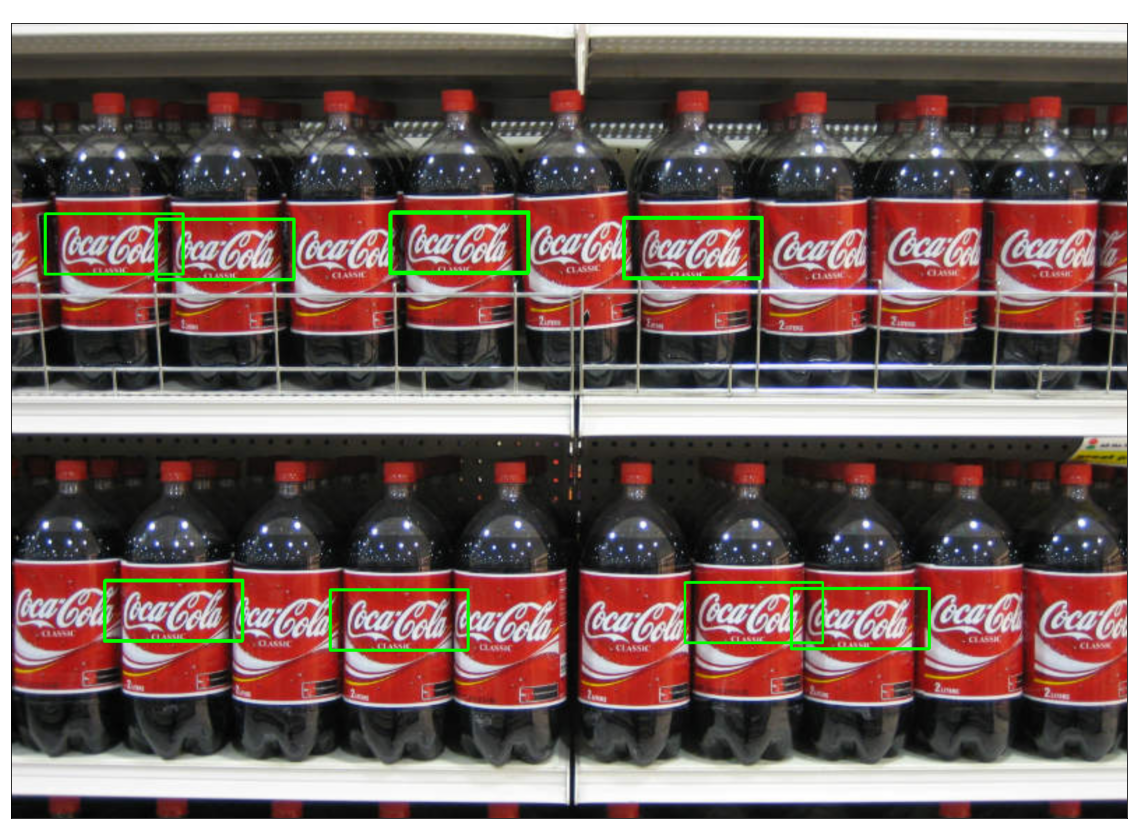

In [89]:
img = cv.imread('C:/Users\juana\OneDrive\Documentos\IA\CEIA\VPC1\Material_TPs\TP3\images\coca_multi.png')
templ = cv.imread('C:/Users\juana\OneDrive\Documentos\IA\CEIA\VPC1\Material_TPs\TP3\images\pattern.png')

loc = multi_detection(img, templ, 0.85)
